In [1]:
import image_neighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from imutils import build_montages


File ../00_data/00_test_pic_full/.DS_Store is not readable.
File ../00_data/00_test_pic_full/.DS_Store is not readable.


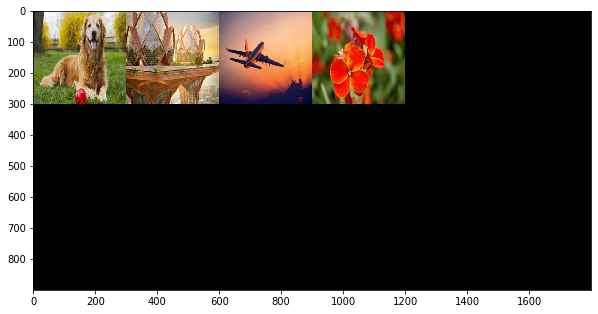

In [2]:
image_neighbors.mix_n_match_neighbors("../00_data/00_test_pic_full", "target_01", 3)

In [3]:
valid_path, features, feature_list = image_neighbors.img_get_feature("../00_data/00_test_pic_full")

File ../00_data/00_test_pic_full/.DS_Store is not readable.
File ../00_data/00_test_pic_full/.DS_Store is not readable.


In [4]:
feature_list 

[[53.9456,
  184.0193,
  139.6262,
  104.00922051944494,
  27.959908221473604,
  51.89125434348389,
  119.73929427886134,
  109.72862526307148],
 [33.3954,
  105.133,
  139.9589,
  43.10774883255165,
  60.06020261825161,
  108.83541264288348,
  110.89883593465191,
  70.53635746724308],
 [55.7401,
  123.4399,
  38.2442,
  17.558230436247342,
  44.01570922508447,
  6.9568084300791995,
  13.60225265016101,
  5.225612064623181],
 [76.7345,
  141.2243,
  121.0788,
  64.64567563133436,
  61.43287535768723,
  42.473050615611115,
  41.08766073869608,
  16.906101231208353],
 [80.5466,
  105.4917,
  84.8217,
  33.92760695328749,
  71.68754225236405,
  21.132321346837315,
  22.027541999761773,
  13.212869369236238],
 [0.0,
  0.0,
  28.9088,
  0.0,
  36.204048751965296,
  4.950480272478753,
  4.950480272478753,
  4.950480272478753],
 [39.9203,
  169.9703,
  95.2951,
  106.79324953720543,
  75.3949906350822,
  20.273344712314994,
  26.864198847856223,
  9.410461560344814],
 [11.645,
  1.3054,
  114

In [5]:
scaled_feature_list = image_neighbors.scale_feature(feature_list)
scaled_feature_list

array([[ 1.51492936e-01,  1.20844752e+00,  3.14675164e-01,
         1.58053463e+00, -1.30340946e+00, -4.16196470e-01,
         4.74261174e-01,  5.29938009e-01],
       [-4.89132663e-01, -6.66484745e-02,  3.22349973e-01,
        -2.40061473e-01,  3.87312034e-01,  3.79665582e-01,
         3.46964188e-01, -1.14905073e-02],
       [ 2.07434126e-01,  2.29259114e-01, -2.02403094e+00,
        -1.00384193e+00, -4.57750925e-01, -1.04420857e+00,
        -1.05404482e+00, -9.13737353e-01],
       [ 8.61907078e-01,  5.16721160e-01, -1.13181040e-01,
         4.03795965e-01,  4.59610663e-01, -5.47827022e-01,
        -6.58272401e-01, -7.52375169e-01],
       [ 9.80744308e-01, -6.08505485e-02, -9.49569168e-01,
        -5.14493766e-01,  9.99723644e-01, -8.46088988e-01,
        -9.32726006e-01, -8.03395974e-01],
       [-1.53019057e+00, -1.76598875e+00, -2.23938236e+00,
        -1.52872983e+00, -8.69190835e-01, -1.07224938e+00,
        -1.17862485e+00, -9.17538210e-01],
       [-2.85727442e-01,  9.813634

In [6]:
target_index = image_neighbors.find_target_image(valid_path, target_image = "target_01")

In [7]:
list_of_neighbors = image_neighbors.find_neighbors(valid_path, features, scaled_feature_list, 6, target_index)

In [8]:
list_of_neighbors

[['../00_data/00_test_pic_full/target_01.jpg'],
 ['../00_data/00_test_pic_full/corner.jpg'],
 ['../00_data/00_test_pic_full/airplane.jpg'],
 ['../00_data/00_test_pic_full/image_01125.jpg'],
 ['../00_data/00_test_pic_full/horse.jpg'],
 ['../00_data/00_test_pic_full/flower.jpg'],
 ['../00_data/00_test_pic_full/image_00969.jpg']]

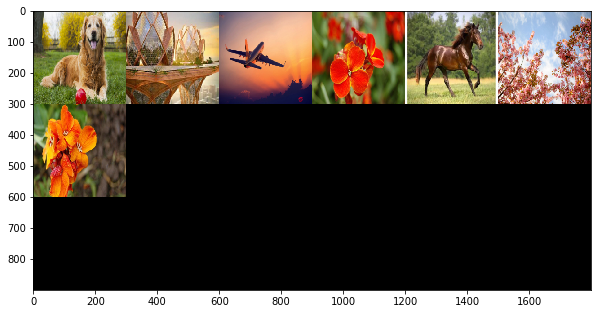

In [9]:
image_neighbors.show_result_in_plot_knn(list_of_neighbors)

In [10]:
def img_resize_plot(img, height = 220, width = 220): # it takes a image (as array) and resize it. 
    
    dim = (width, height)
    list_resize = []
    
    img_res = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
    
    return img_res

def show_result_in_plot_knn(list_of_neighbors):

        images_plot = []
        
        for path in list_of_neighbors:
            img = mpimg.imread(path[0])
            img_res = img_resize_plot(img)
            images_plot.append(img_res)
            
            montages = build_montages(images_plot, (300,300), (6,3))
    
        for montage in montages:
            plt.figure(figsize=(10,10))
            imgplot = plt.imshow(montage)
            plt.show() 
        
        

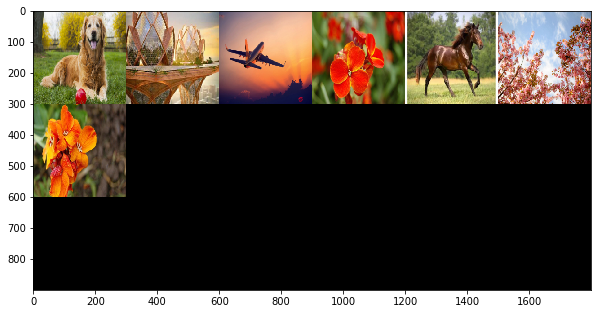

In [11]:
show_result_in_plot_knn(list_of_neighbors)